In [15]:
import tensorflow as tf
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
import numpy as np
from urllib import request
import gzip
import pickle
filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]
folder = 'data_mnist/'
def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading " + name[1] + "...")
        
        # lưu vào folder data_mnist
        request.urlretrieve(base_url + name[1], folder + name[1])
    print("Download complete.")
def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(folder+name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(folder+name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open(folder+"mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")
def init():
    download_mnist()
    save_mnist()
def load():
    with open(folder+"mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]


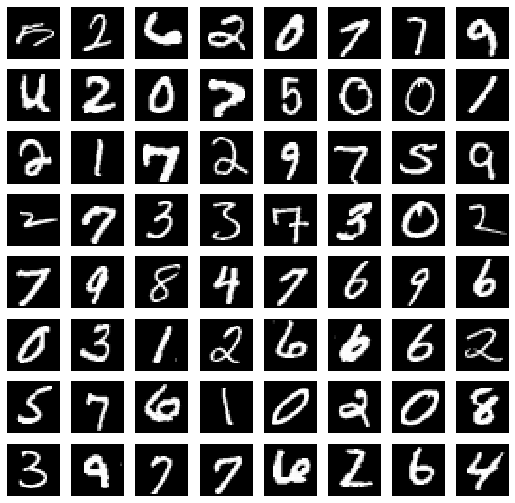

In [17]:
import matplotlib.pyplot as plt 
import numpy as np
# Kiểm tra ngẫu nhiên 9 mẫu training trong tổng số 60.000 mẫu
# Tạo số ngẫu nhiên nhưng không thay đổi khi ru  nhiều lần
np.random.seed(100) 
# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 60.000 phần tử
m_train = x_train.shape[0]
indices = list(np.random.randint(m_train, size=64))
fig = plt.figure(figsize=(9,9))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = x_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    
    #plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()